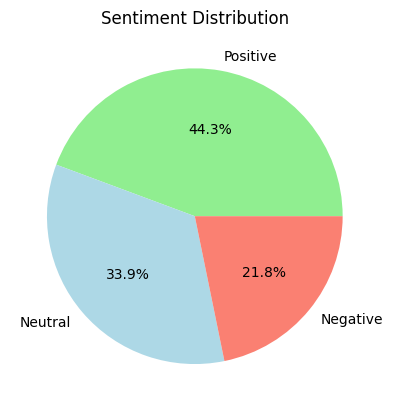

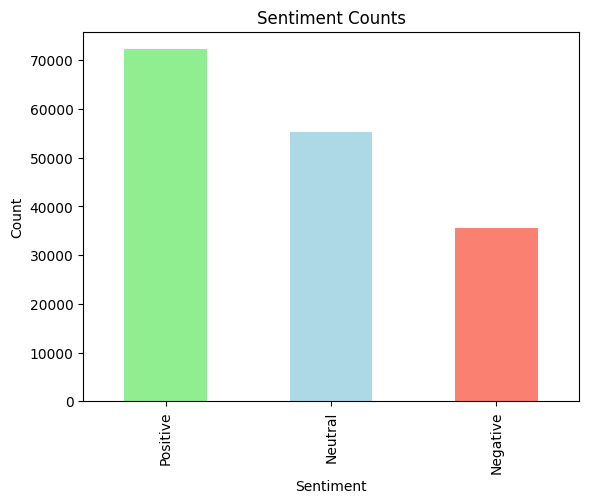

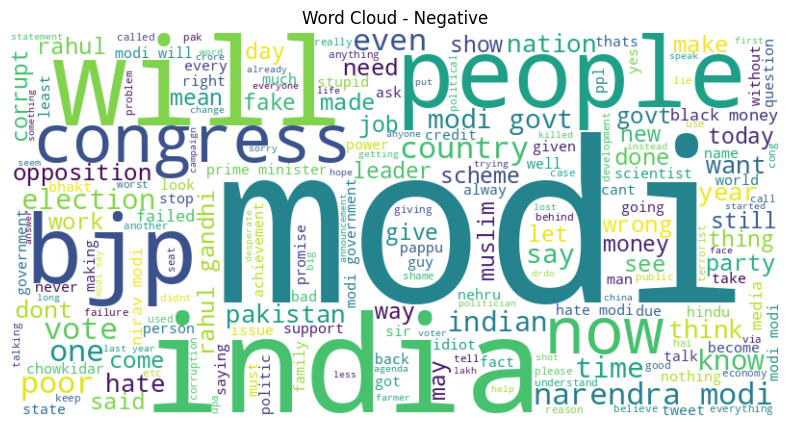

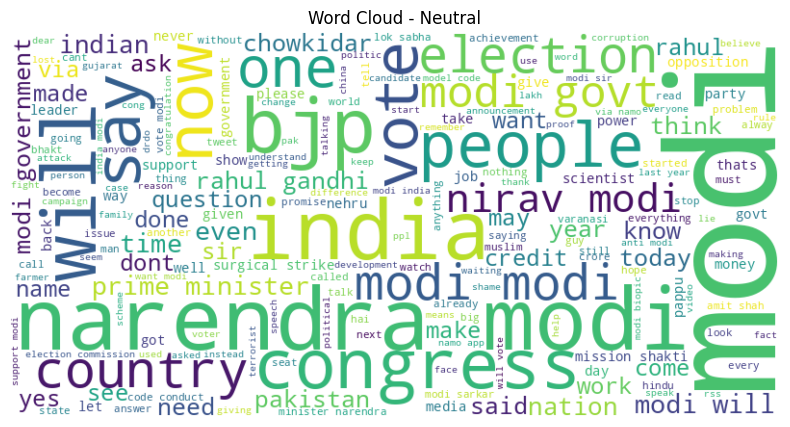

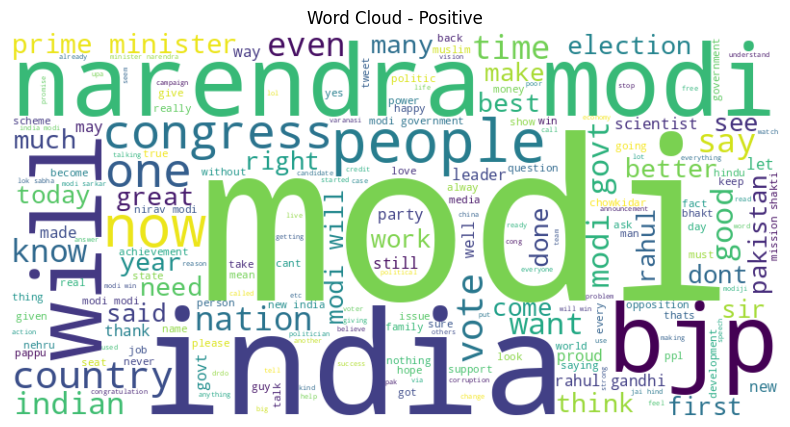

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load dataset
df = pd.read_csv("/content/Twitter_Data.csv")
df.dropna(inplace=True)

# Map numeric category to sentiment labels
sentiment_map = {1.0: "Positive", 0.0: "Neutral", -1.0: "Negative"}
df['Sentiment'] = df['category'].map(sentiment_map)

# Pie chart of sentiment distribution
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['lightgreen', 'lightblue', 'salmon'])
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.show()

# Bar chart of sentiment counts
df['Sentiment'].value_counts().plot(kind='bar', color=['lightgreen', 'lightblue', 'salmon'])
plt.title("Sentiment Counts")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Generate Word Clouds for each sentiment
for sentiment in df['Sentiment'].unique():
    text = " ".join(df[df['Sentiment'] == sentiment]['clean_text'].astype(str))
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud - {sentiment}")
    plt.show()


Enter the name of the text column: clean_text
Enter the name of the sentiment column: category


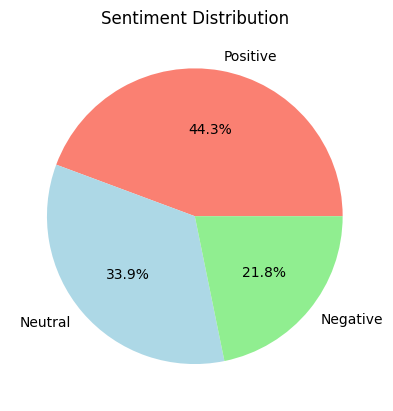

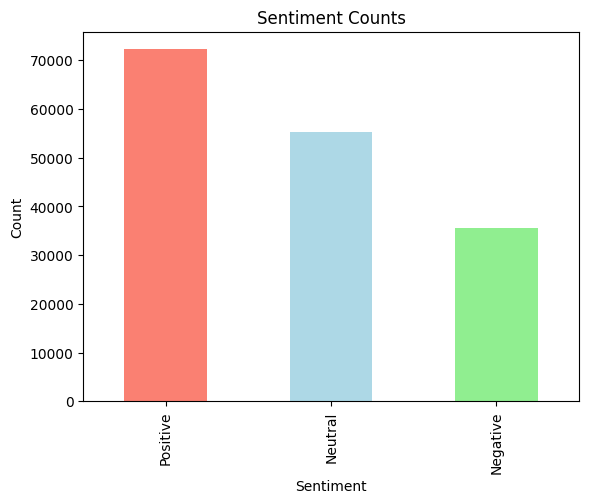

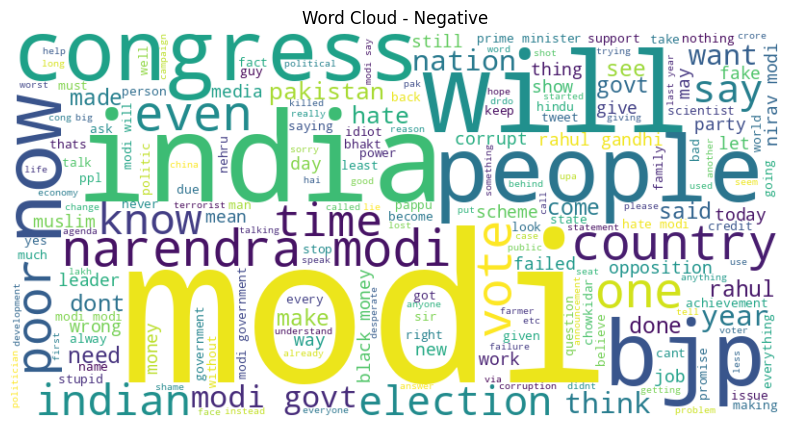

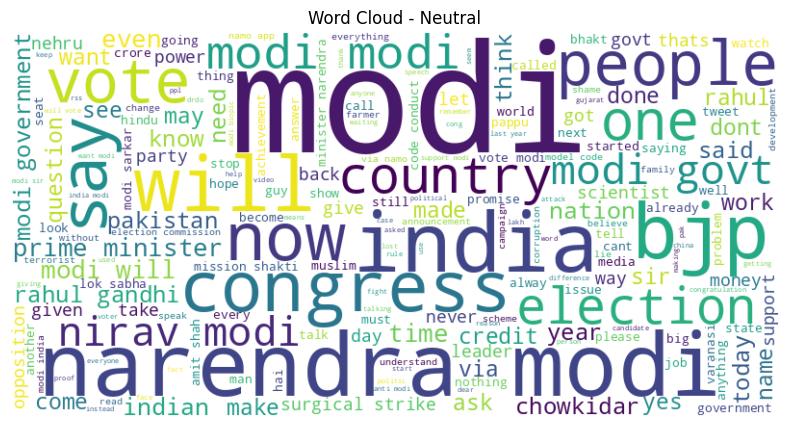

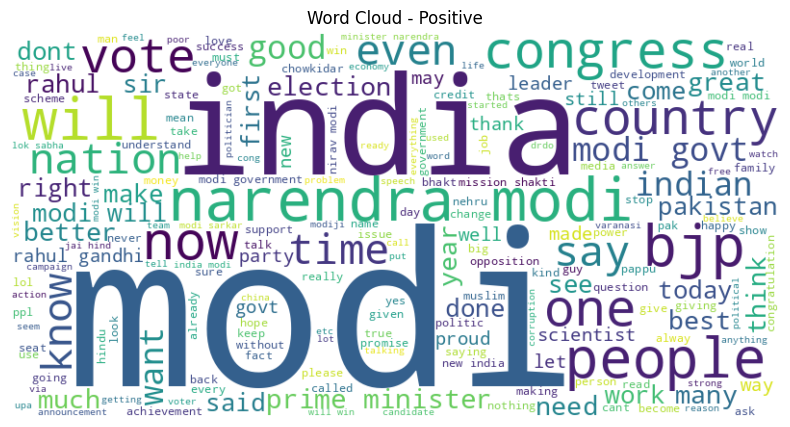

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Load your dataset
file_path = "/content/Twitter_Data.csv"  # Change this to your file path
df = pd.read_csv(file_path)
df.dropna(inplace=True)

# Ask user to define the text and sentiment columns
text_col = input("Enter the name of the text column: ").strip()
sentiment_col = input("Enter the name of the sentiment column: ").strip()

# Convert to consistent format
df[text_col] = df[text_col].astype(str)

# Automatically map sentiment labels if needed
if df[sentiment_col].dtype != 'object':
    unique_vals = sorted(df[sentiment_col].dropna().unique())
    sentiment_map = {unique_vals[0]: "Negative", unique_vals[1]: "Neutral", unique_vals[2]: "Positive"}
    df['Sentiment'] = df[sentiment_col].map(sentiment_map)
else:
    df['Sentiment'] = df[sentiment_col].str.capitalize()

# Pie chart of sentiment distribution
df['Sentiment'].value_counts().plot.pie(autopct='%1.1f%%', colors=['salmon', 'lightblue', 'lightgreen'])
plt.title("Sentiment Distribution")
plt.ylabel("")
plt.show()

# Bar chart of sentiment counts
df['Sentiment'].value_counts().plot(kind='bar', color=['salmon', 'lightblue', 'lightgreen'])
plt.title("Sentiment Counts")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# Generate Word Clouds for each sentiment
for sentiment in df['Sentiment'].unique():
    text = " ".join(df[df['Sentiment'] == sentiment][text_col])
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis("off")
    plt.title(f"Word Cloud - {sentiment}")
    plt.show()
